## Importing Desired Libraries 

In [1]:
import re
import time
import warnings
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import seaborn as sns
from mlxtend.classifier import StackingClassifier
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import xgboost as xgb

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## About Data

In [2]:
#loading data 
df = pd.read_csv('/Users/ravishaggarwal/Desktop/fingerprints_gt_ver3.csv')

In [3]:
df.shape

(343449, 4)

In [4]:
#General information of data 
print('Number of data points : ', df.shape[0])
print('Number of features : ', df.shape[1])
print('Features : ', df.columns.values)
df.head(5)

Number of data points :  343449
Number of features :  4
Features :  ['fr_observation_time' 'fr_values' 'fr_mac_address_id' 'zo_name']


,fr_observation_time,fr_values,fr_mac_address_id,zo_name
0,2015-12-08 10:00:13,"{'12': '-69', '33': '-61', '128': '-68', '276'...",2002427,Zone 355
1,2015-12-08 10:00:13,"{'9': '-83', '13': '-67', '33': '-62', '101': ...",3192369,Zone 355
2,2015-12-08 10:00:14,"{'9': '-83', '10': '-77', '11': '-85', '12': '...",2002427,Zone 355
3,2015-12-08 10:00:14,"{'9': '-86', '10': '-83', '11': '-87', '12': '...",3192369,Zone 355
4,2015-12-08 10:00:15,"{'10': '-76', '11': '-86', '12': '-65', '13': ...",480806,Zone 355


__Checking for duplicate rows__

In [5]:
#Checking if there are any duplicate rows in the data 
#There are no duplicate rows in the data
df[df.duplicated( keep=False)]

,fr_observation_time,fr_values,fr_mac_address_id,zo_name


__Checking NaN__

In [6]:
#no NaN values 
nan_rows = df[df.isnull().any(1)]
print(len(nan_rows))

0


## Feature Analysis 

## Analysing individual features-- 'fr_observation_time'

In [7]:
#converting the datetime format to unix time stamp
from datetime import datetime
from time import mktime        
s = '2015-12-08 10:00:13'

In [8]:
#example
newDate = time.mktime(datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())

In [9]:
newDate

1449565213.0

In [10]:
#converting to unix timestamp
date_date = []
for index,row in df.iterrows():
    date_date.append(time.mktime(datetime.strptime(row['fr_observation_time'], "%Y-%m-%d %H:%M:%S").timetuple()))

In [11]:
df['unix_timestamp']= date_date

In [12]:
#It is already mentioned in the readme.md file that the 'fr_observation_time'  is in ascending order which means that the 
#time are arranged from old value to new-est value
df.head(5)

,fr_observation_time,fr_values,fr_mac_address_id,zo_name,unix_timestamp
0,2015-12-08 10:00:13,"{'12': '-69', '33': '-61', '128': '-68', '276'...",2002427,Zone 355,1.449565e+09
1,2015-12-08 10:00:13,"{'9': '-83', '13': '-67', '33': '-62', '101': ...",3192369,Zone 355,1.449565e+09
2,2015-12-08 10:00:14,"{'9': '-83', '10': '-77', '11': '-85', '12': '...",2002427,Zone 355,1.449565e+09
3,2015-12-08 10:00:14,"{'9': '-86', '10': '-83', '11': '-87', '12': '...",3192369,Zone 355,1.449565e+09
4,2015-12-08 10:00:15,"{'10': '-76', '11': '-86', '12': '-65', '13': ...",480806,Zone 355,1.449565e+09


__the goal of converting the date time feature to unix time stamp is to perform time based splitting of the data easily into training, CV and test data.__

## Analysing individual features-- 'fr_values'

In [13]:
df['fr_values'].head(5)

0    {'12': '-69', '33': '-61', '128': '-68', '276'...
1    {'9': '-83', '13': '-67', '33': '-62', '101': ...
2    {'9': '-83', '10': '-77', '11': '-85', '12': '...
3    {'9': '-86', '10': '-83', '11': '-87', '12': '...
4    {'10': '-76', '11': '-86', '12': '-65', '13': ...
Name: fr_values, dtype: object

__Here the rows of dictionary is provided where key represents the nodes and value are the signal values__
__Also it is given that the total no of nodes in the data are 261__
__it is better to have the columns of each node having values of signals__ 

In [14]:
#converting the dictionaries to columns 
s = df['fr_values'].map(eval)
d = s.apply(pd.Series)

In [15]:
#here we have converted all the nodes which are 261 into seperate columns
d.shape

(343449, 261)

__NaN Treatment__

In [16]:
d.head(5)

,1,10,101,102,103,104,105,107,109,11,...,89,9,90,91,92,93,94,97,98,99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,-64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-77,-69,-71,NaN,NaN,NaN,NaN,NaN,-85,...,NaN,-83,NaN,NaN,NaN,NaN,NaN,NaN,-79,-74
3,NaN,-83,-65,NaN,NaN,NaN,NaN,NaN,NaN,-87,...,NaN,-86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80
4,NaN,-76,-65,NaN,NaN,NaN,NaN,NaN,NaN,-86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__We see many NaN values,this is because__

- Every row in 'fr_values ' column consist of dictionary representation of nodes and signal values
- Each row consist of varied number of nodes 

__NaNs are the values which are not present in that row__ 



__It is mentioned in the given readme file  that the minimum signal strength is -100 and maximum signal strength is 0 and wherever the nodes are not present we assume the signal value to be -100__

__So for every NaN value replacing it with -100 value signifying the weakest signal in those nodes whose values are not present in the given data__

In [17]:
data = d.fillna(-100)

In [18]:
data.head(5)

,1,10,101,102,103,104,105,107,109,11,...,89,9,90,91,92,93,94,97,98,99
0,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
1,-100,-100,-64,-100,-100,-100,-100,-100,-100,-100,...,-100,-83,-100,-100,-100,-100,-100,-100,-100,-100
2,-100,-77,-69,-71,-100,-100,-100,-100,-100,-85,...,-100,-83,-100,-100,-100,-100,-100,-100,-79,-74
3,-100,-83,-65,-100,-100,-100,-100,-100,-100,-87,...,-100,-86,-100,-100,-100,-100,-100,-100,-100,-80
4,-100,-76,-65,-100,-100,-100,-100,-100,-100,-86,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100


In [19]:
#joining new columns in previous data 
df = pd.concat([df,data ], axis=1)

In [20]:
df.shape

(343449, 266)

In [21]:
df.head(3)

,fr_observation_time,fr_values,fr_mac_address_id,zo_name,unix_timestamp,1,10,101,102,103,...,89,9,90,91,92,93,94,97,98,99
0,2015-12-08 10:00:13,"{'12': '-69', '33': '-61', '128': '-68', '276'...",2002427,Zone 355,1.449565e+09,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
1,2015-12-08 10:00:13,"{'9': '-83', '13': '-67', '33': '-62', '101': ...",3192369,Zone 355,1.449565e+09,-100,-100,-64,-100,-100,...,-100,-83,-100,-100,-100,-100,-100,-100,-100,-100
2,2015-12-08 10:00:14,"{'9': '-83', '10': '-77', '11': '-85', '12': '...",2002427,Zone 355,1.449565e+09,-100,-77,-69,-71,-100,...,-100,-83,-100,-100,-100,-100,-100,-100,-79,-74


## Analysing individual features-- 'fr_mac_address_id'

- It is mentioned in the readme file that the unique number of mac ids are 19.

- It is a categorical variable

- Featurizing this categorical variable using dummy encoding

In [22]:
#occurance of different partners 
#there are in all 19 uniques partners  
df['fr_mac_address_id'].value_counts()

906632     37715
9819584    28236
480802     27345
9651817    26934
2002427    24171
1832410    22960
3192369    22403
919610     21521
9819586    21362
480806     21094
9651818    20971
9819585    20507
9819582    19190
911476      8013
9651816     7135
911305      7046
9651820     5099
9651819     1126
390442       621
Name: fr_mac_address_id, dtype: int64

In [23]:
#It is a categorical variable with 19 unique types 
#doing dummy encoding of the 'fr_mac_address_id' feature 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
mac = le.fit_transform(df['fr_mac_address_id'])

In [25]:
df['fr_mac_address_id_dummy'] = mac 

In [26]:
fr_mac_address_id_dummy_uniq = df['fr_mac_address_id_dummy'].value_counts()
print('Number of unique mac ids :', fr_mac_address_id_dummy_uniq.shape[0])

print(fr_mac_address_id_dummy_uniq)

Number of unique mac ids : 19
3     37715
16    28236
1     27345
11    26934
8     24171
7     22960
9     22403
6     21521
18    21362
2     21094
12    20971
17    20507
15    19190
5      8013
10     7135
4      7046
14     5099
13     1126
0       621
Name: fr_mac_address_id_dummy, dtype: int64


In [27]:
print("Ans: There are", fr_mac_address_id_dummy_uniq.shape[0] ,"different categories of mac ids , and they are distibuted as follows",)

Ans: There are 19 different categories of mac ids , and they are distibuted as follows


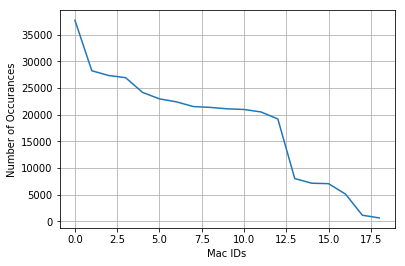

In [28]:
s = sum(fr_mac_address_id_dummy_uniq.values);
h = fr_mac_address_id_dummy_uniq.values;
plt.plot(h)
plt.xlabel('Mac IDs')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

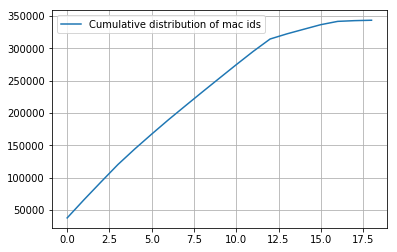

In [29]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of mac ids')
plt.grid()
plt.legend()
plt.show()

__Mac ids with dummy encoding until approx 15 are important ones in the data__

In [30]:
df.head(3)

,fr_observation_time,fr_values,fr_mac_address_id,zo_name,unix_timestamp,1,10,101,102,103,...,9,90,91,92,93,94,97,98,99,fr_mac_address_id_dummy
0,2015-12-08 10:00:13,"{'12': '-69', '33': '-61', '128': '-68', '276'...",2002427,Zone 355,1.449565e+09,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,8
1,2015-12-08 10:00:13,"{'9': '-83', '13': '-67', '33': '-62', '101': ...",3192369,Zone 355,1.449565e+09,-100,-100,-64,-100,-100,...,-83,-100,-100,-100,-100,-100,-100,-100,-100,9
2,2015-12-08 10:00:14,"{'9': '-83', '10': '-77', '11': '-85', '12': '...",2002427,Zone 355,1.449565e+09,-100,-77,-69,-71,-100,...,-83,-100,-100,-100,-100,-100,-100,-79,-74,8


## Analysing individual features-- 'zo_name'

- It is mentioned in the readme file that the unique number of zones  are 449.
- It is a categorical variable
- Featurizing this categorical variable using dummy encoding

In [31]:
#occurance of different partners 
#there are in all 449 uniques partners  
df['zo_name'].value_counts()

Zone 548    1799
Zone 409    1701
Zone 410    1640
Zone 556    1592
Zone 74     1590
Zone 414    1580
Zone 546    1568
Zone 33     1305
Zone 492    1264
Zone 185    1217
Zone 11     1216
Zone 351    1211
Zone 184    1211
Zone 13     1206
Zone 178    1199
Zone 6      1198
Zone 190    1198
Zone 14     1193
Zone 116    1189
Zone 92     1189
Zone 183    1188
Zone 93     1180
Zone 436    1179
Zone 109    1178
Zone 278    1176
Zone 115    1170
Zone 15     1169
Zone 111    1169
Zone 16     1168
Zone 91     1165
            ... 
Zone 257     198
Zone 451     193
Zone 318     177
Zone 205     177
Zone 321     176
Zone 63      166
Zone 401     165
Zone 213     155
Zone 517     140
Zone 216     124
Zone 281     116
Zone 209     115
Zone 122     114
Zone 307     104
Zone 259      98
Zone 138      85
Zone 140      78
Zone 228      76
Zone 8        59
Zone 61       48
Zone 523      47
Zone 313      46
Zone 3        44
Zone 289      42
Zone 320      36
Zone 422      31
Zone 265      13
Zone 260      

In [32]:
#It is a categorical variable with 449 unique types 
#doing dummy encoding of the 'zo_name' feature 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
zone = le.fit_transform(df['zo_name'])

In [34]:
df['zo_name_dummy'] = zone 

In [35]:
df.head(5)

,fr_observation_time,fr_values,fr_mac_address_id,zo_name,unix_timestamp,1,10,101,102,103,...,90,91,92,93,94,97,98,99,fr_mac_address_id_dummy,zo_name_dummy
0,2015-12-08 10:00:13,"{'12': '-69', '33': '-61', '128': '-68', '276'...",2002427,Zone 355,1.449565e+09,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,8,220
1,2015-12-08 10:00:13,"{'9': '-83', '13': '-67', '33': '-62', '101': ...",3192369,Zone 355,1.449565e+09,-100,-100,-64,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,9,220
2,2015-12-08 10:00:14,"{'9': '-83', '10': '-77', '11': '-85', '12': '...",2002427,Zone 355,1.449565e+09,-100,-77,-69,-71,-100,...,-100,-100,-100,-100,-100,-100,-79,-74,8,220
3,2015-12-08 10:00:14,"{'9': '-86', '10': '-83', '11': '-87', '12': '...",3192369,Zone 355,1.449565e+09,-100,-83,-65,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-80,9,220
4,2015-12-08 10:00:15,"{'10': '-76', '11': '-86', '12': '-65', '13': ...",480806,Zone 355,1.449565e+09,-100,-76,-65,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,2,220


In [36]:
zo_name_dummy_uniq = df['zo_name_dummy'].value_counts()
print('Number of Unique Zones :', zo_name_dummy_uniq.shape[0])

print(zo_name_dummy_uniq)

Number of Unique Zones : 449
379    1799
254    1701
256    1640
388    1592
422    1590
259    1580
378    1568
193    1305
336    1264
47     1217
12     1216
46     1211
216    1211
28     1206
39     1199
53     1198
403    1198
32     1193
442    1189
19     1189
45     1188
443    1180
279    1179
11     1178
137    1176
18     1170
35     1169
14     1169
37     1168
441    1165
       ... 
118     198
295     193
180     177
70      177
184     176
410     166
249     165
79      155
364     140
82      124
141     116
74      115
26      114
169     104
120      98
30       85
33       78
95       76
428      59
406      48
371      47
175      46
160      44
148      42
183      36
266      31
125      13
122       4
0         4
119       3
Name: zo_name_dummy, Length: 449, dtype: int64


In [37]:
print("Ans: There are", zo_name_dummy_uniq.shape[0] ,"different categories of zones in the data, and they are distibuted as follows",)

Ans: There are 449 different categories of zones in the data, and they are distibuted as follows


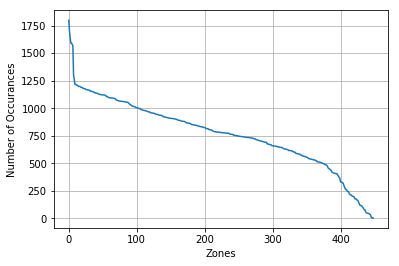

In [38]:
s = sum(zo_name_dummy_uniq.values);
h = zo_name_dummy_uniq.values;
plt.plot(h)
plt.xlabel('Zones')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

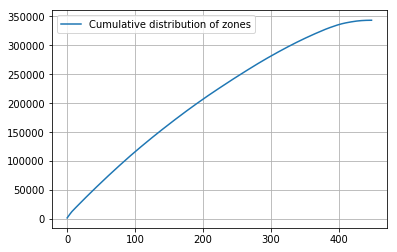

In [39]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of zones')
plt.grid()
plt.legend()
plt.show()

__400 zones are most important__

## Preparing data for Machine Learning

In [40]:
df.shape

(343449, 268)

In [41]:
df.head(5)

,fr_observation_time,fr_values,fr_mac_address_id,zo_name,unix_timestamp,1,10,101,102,103,...,90,91,92,93,94,97,98,99,fr_mac_address_id_dummy,zo_name_dummy
0,2015-12-08 10:00:13,"{'12': '-69', '33': '-61', '128': '-68', '276'...",2002427,Zone 355,1.449565e+09,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,8,220
1,2015-12-08 10:00:13,"{'9': '-83', '13': '-67', '33': '-62', '101': ...",3192369,Zone 355,1.449565e+09,-100,-100,-64,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,9,220
2,2015-12-08 10:00:14,"{'9': '-83', '10': '-77', '11': '-85', '12': '...",2002427,Zone 355,1.449565e+09,-100,-77,-69,-71,-100,...,-100,-100,-100,-100,-100,-100,-79,-74,8,220
3,2015-12-08 10:00:14,"{'9': '-86', '10': '-83', '11': '-87', '12': '...",3192369,Zone 355,1.449565e+09,-100,-83,-65,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-80,9,220
4,2015-12-08 10:00:15,"{'10': '-76', '11': '-86', '12': '-65', '13': ...",480806,Zone 355,1.449565e+09,-100,-76,-65,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,2,220


In [42]:
df.columns

Index(['fr_observation_time', 'fr_values', 'fr_mac_address_id', 'zo_name',
       'unix_timestamp', '1', '10', '101', '102', '103',
       ...
       '90', '91', '92', '93', '94', '97', '98', '99',
       'fr_mac_address_id_dummy', 'zo_name_dummy'],
      dtype='object', length=268)

__Droping the columns 'fr_values','fr_mac_address_id','zo_name' as we will be taking into account the dummy encoded features of these columns__

__Droping the column 'fr_observation_time'and taking into account unix timestamp__ 

In [43]:
columns = ['fr_observation_time','fr_values','fr_mac_address_id','zo_name']
df.drop(columns, inplace=True, axis=1)

In [44]:
df.shape

(343449, 264)

In [45]:
df.head(5)

,unix_timestamp,1,10,101,102,103,104,105,107,109,...,90,91,92,93,94,97,98,99,fr_mac_address_id_dummy,zo_name_dummy
0,1.449565e+09,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,8,220
1,1.449565e+09,-100,-100,-64,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,9,220
2,1.449565e+09,-100,-77,-69,-71,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-79,-74,8,220
3,1.449565e+09,-100,-83,-65,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-80,9,220
4,1.449565e+09,-100,-76,-65,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,2,220


In [46]:
final_data = df

__Spliting the data into Train,CV and Test dataset__

__Since the unix time stamps are ordered in ascending order__

- Training Data comprises of 64% of data with old time 
- CV data comprises of 20 % of the new fowllowing time
- Test data comprises of the latest 16% time 

__Meaning that, we are trainng our data using the features present in the old time then checking and evaluating the hyperparameter
 using CV data which comprises the features with the time following the training data time. And eventually testing our trained model on the test data which is unseen and comprises of the newest time__

__This split is not a random split but a time based split and as the timestamps are already in the ascending order we do 
not need to sort the data. We assume that the training data consitute the time from the start followed by the CV data and test data consitute the 
latest time specific data__
 

In [47]:
#y_true has the class labels 
#final_data without class labels
y_true = final_data['zo_name_dummy']
#final_data = final_data.drop(['zo_name_dummy'],axis=1)

In [48]:
X_train, test_df, y_train, y_test = train_test_split(final_data, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

__Splitting data into train, test and cross validation (64:20:16)__

__We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set__

In [49]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 219807
Number of data points in test data: 68690
Number of data points in cross validation data: 54952


In [50]:
print('Number of data points in train data class label :',  y_train.shape[0])
print('Number of data points in test data:', y_test.shape[0])
print('Number of data points in cross validation data:', y_cv.shape[0])

Number of data points in train data class label : 219807
Number of data points in test data: 68690
Number of data points in cross validation data: 54952


__Distribution of class labels in Train, Test and Cross Validation datasets__

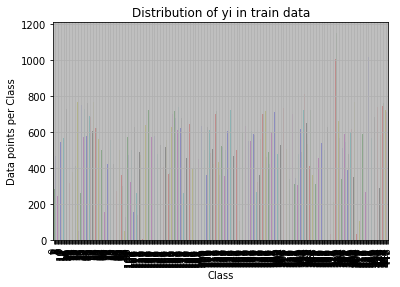

Number of data points in class 380 : 1151 ( 0.524 %)
Number of data points in class 255 : 1089 ( 0.495 %)
Number of data points in class 257 : 1049 ( 0.477 %)
Number of data points in class 389 : 1019 ( 0.464 %)
Number of data points in class 423 : 1017 ( 0.463 %)
Number of data points in class 260 : 1011 ( 0.46 %)
Number of data points in class 379 : 1003 ( 0.456 %)
Number of data points in class 194 : 835 ( 0.38 %)
Number of data points in class 337 : 809 ( 0.368 %)
Number of data points in class 48 : 779 ( 0.354 %)
Number of data points in class 13 : 778 ( 0.354 %)
Number of data points in class 217 : 775 ( 0.353 %)
Number of data points in class 47 : 775 ( 0.353 %)
Number of data points in class 29 : 772 ( 0.351 %)
Number of data points in class 40 : 767 ( 0.349 %)
Number of data points in class 54 : 766 ( 0.348 %)
Number of data points in class 404 : 766 ( 0.348 %)
Number of data points in class 33 : 763 ( 0.347 %)
Number of data points in class 20 : 761 ( 0.346 %)
Number of data 

Number of data points in class 301 : 474 ( 0.216 %)
Number of data points in class 304 : 473 ( 0.215 %)
Number of data points in class 173 : 472 ( 0.215 %)
Number of data points in class 122 : 472 ( 0.215 %)
Number of data points in class 117 : 471 ( 0.214 %)
Number of data points in class 192 : 471 ( 0.214 %)
Number of data points in class 115 : 470 ( 0.214 %)
Number of data points in class 101 : 470 ( 0.214 %)
Number of data points in class 320 : 470 ( 0.214 %)
Number of data points in class 394 : 469 ( 0.213 %)
Number of data points in class 188 : 469 ( 0.213 %)
Number of data points in class 90 : 468 ( 0.213 %)
Number of data points in class 3 : 466 ( 0.212 %)
Number of data points in class 264 : 466 ( 0.212 %)
Number of data points in class 390 : 466 ( 0.212 %)
Number of data points in class 242 : 466 ( 0.212 %)
Number of data points in class 70 : 462 ( 0.21 %)
Number of data points in class 32 : 462 ( 0.21 %)
Number of data points in class 102 : 462 ( 0.21 %)
Number of data point

Number of data points in class 267 : 20 ( 0.009 %)
Number of data points in class 126 : 9 ( 0.004 %)
Number of data points in class 123 : 2 ( 0.001 %)
Number of data points in class 120 : 2 ( 0.001 %)
Number of data points in class 1 : 2 ( 0.001 %)
--------------------------------------------------------------------------------


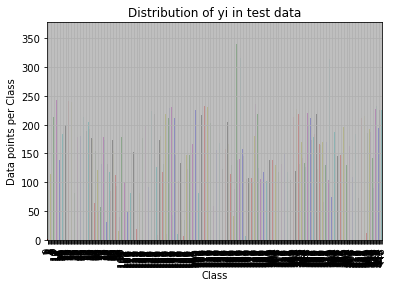

Number of data points in class 379 : 360 ( 0.524 %)
Number of data points in class 254 : 340 ( 0.495 %)
Number of data points in class 256 : 328 ( 0.478 %)
Number of data points in class 422 : 318 ( 0.463 %)
Number of data points in class 388 : 318 ( 0.463 %)
Number of data points in class 259 : 316 ( 0.46 %)
Number of data points in class 378 : 314 ( 0.457 %)
Number of data points in class 193 : 261 ( 0.38 %)
Number of data points in class 336 : 253 ( 0.368 %)
Number of data points in class 48 : 243 ( 0.354 %)
Number of data points in class 13 : 243 ( 0.354 %)
Number of data points in class 47 : 242 ( 0.352 %)
Number of data points in class 216 : 242 ( 0.352 %)
Number of data points in class 29 : 241 ( 0.351 %)
Number of data points in class 40 : 240 ( 0.349 %)
Number of data points in class 403 : 240 ( 0.349 %)
Number of data points in class 54 : 240 ( 0.349 %)
Number of data points in class 33 : 239 ( 0.348 %)
Number of data points in class 46 : 238 ( 0.346 %)
Number of data points 

Number of data points in class 258 : 141 ( 0.205 %)
Number of data points in class 307 : 141 ( 0.205 %)
Number of data points in class 178 : 141 ( 0.205 %)
Number of data points in class 194 : 140 ( 0.204 %)
Number of data points in class 234 : 140 ( 0.204 %)
Number of data points in class 297 : 140 ( 0.204 %)
Number of data points in class 302 : 139 ( 0.202 %)
Number of data points in class 298 : 139 ( 0.202 %)
Number of data points in class 17 : 138 ( 0.201 %)
Number of data points in class 181 : 138 ( 0.201 %)
Number of data points in class 255 : 138 ( 0.201 %)
Number of data points in class 157 : 138 ( 0.201 %)
Number of data points in class 221 : 135 ( 0.197 %)
Number of data points in class 240 : 135 ( 0.197 %)
Number of data points in class 305 : 134 ( 0.195 %)
Number of data points in class 435 : 134 ( 0.195 %)
Number of data points in class 179 : 134 ( 0.195 %)
Number of data points in class 291 : 134 ( 0.195 %)
Number of data points in class 345 : 133 ( 0.194 %)
Number of dat

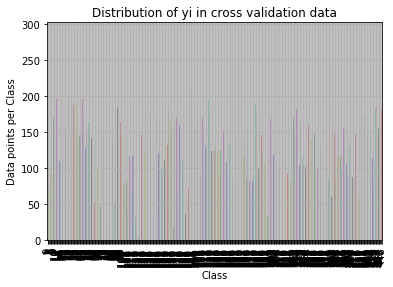

Number of data points in class 380 : 288 ( 0.524 %)
Number of data points in class 255 : 272 ( 0.495 %)
Number of data points in class 257 : 263 ( 0.479 %)
Number of data points in class 389 : 255 ( 0.464 %)
Number of data points in class 423 : 255 ( 0.464 %)
Number of data points in class 260 : 253 ( 0.46 %)
Number of data points in class 379 : 251 ( 0.457 %)
Number of data points in class 194 : 209 ( 0.38 %)
Number of data points in class 337 : 202 ( 0.368 %)
Number of data points in class 48 : 195 ( 0.355 %)
Number of data points in class 13 : 195 ( 0.355 %)
Number of data points in class 217 : 194 ( 0.353 %)
Number of data points in class 47 : 194 ( 0.353 %)
Number of data points in class 29 : 193 ( 0.351 %)
Number of data points in class 40 : 192 ( 0.349 %)
Number of data points in class 54 : 192 ( 0.349 %)
Number of data points in class 404 : 192 ( 0.349 %)
Number of data points in class 33 : 191 ( 0.348 %)
Number of data points in class 20 : 190 ( 0.346 %)
Number of data points 

Number of data points in class 117 : 118 ( 0.215 %)
Number of data points in class 192 : 118 ( 0.215 %)
Number of data points in class 115 : 117 ( 0.213 %)
Number of data points in class 101 : 117 ( 0.213 %)
Number of data points in class 320 : 118 ( 0.215 %)
Number of data points in class 394 : 117 ( 0.213 %)
Number of data points in class 188 : 117 ( 0.213 %)
Number of data points in class 90 : 117 ( 0.213 %)
Number of data points in class 3 : 117 ( 0.213 %)
Number of data points in class 264 : 116 ( 0.211 %)
Number of data points in class 390 : 116 ( 0.211 %)
Number of data points in class 242 : 117 ( 0.213 %)
Number of data points in class 70 : 116 ( 0.211 %)
Number of data points in class 32 : 116 ( 0.211 %)
Number of data points in class 102 : 116 ( 0.211 %)
Number of data points in class 286 : 114 ( 0.207 %)
Number of data points in class 111 : 115 ( 0.209 %)
Number of data points in class 437 : 114 ( 0.207 %)
Number of data points in class 343 : 113 ( 0.206 %)
Number of data po

In [51]:

train_class_distribution = train_df['zo_name_dummy'].value_counts().sortlevel()
test_class_distribution = test_df['zo_name_dummy'].value_counts().sortlevel()
cv_class_distribution = cv_df['zo_name_dummy'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()


sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()


sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')

__here we see that the classes have almost similar distribution in Training,Test and CV data__

In [52]:
#removing class labels from the Train,Test and CV data
    
train_df = train_df.drop(['zo_name_dummy'],axis=1)
test_df = test_df .drop(['zo_name_dummy'],axis=1)
cv_df = cv_df .drop(['zo_name_dummy'],axis=1)

In [53]:

#
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]]
    
    plt.figure(figsize=(500,500))
    
    labels = list(range(1, 499))
    '''
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()
    '''
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

## Machine Learning Model 

- In this task we have to predict the zones which is a multiclass classification

- In predicting we need to know how good is our model in predicting the classes and using probabilities is a good approach

- If we may know the probability of prediction of certain class label

- Due to this log loss is a good performance evaluation measure

- Log loss value ranges from 0 to infinity and log loss value more closer to zero better is our model

__Training the model using Random Forest__

__Reasons__

- Data is not high dimensional 
- Features are categorical 
- Runtime complexity is less 
- Easily escalated to calculate multiclass classifications
- Reduced variance in the data and it is already low bias so it some how optimises bias variance trade off 

__Random Forest is a type of Bagging/Bootstraping Ensemble model__
__Random Forest = Fully grown decision trees as base leaners + row sampling with replacement + column sampling + aggregation__

In [54]:
#here we are trying different values of the hyperparameter and calculating log loss and eventually will select the one
#with minimum log loss.
alpha = [100,200,500,1000,2000]  #Hyperparameter base learners/estimators  
max_depth = [5, 10]  #deapth of the decision tree greater the deapth higher the variance        
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df, y_train)  #learning the model using training data
       
        clf_probs = clf.predict_proba(cv_df)  #predicting the labels using CV data 
        cv_log_error_array.append(log_loss(y_cv, clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, clf_probs))  

for n_estimators = 100 and max depth =  5
Log Loss : 4.468531519259374
for n_estimators = 100 and max depth =  10
Log Loss : 3.245583382966254
for n_estimators = 200 and max depth =  5
Log Loss : 4.438024571220739
for n_estimators = 200 and max depth =  10
Log Loss : 3.2163702361744
for n_estimators = 500 and max depth =  5
Log Loss : 4.424336495020084
for n_estimators = 500 and max depth =  10
Log Loss : 3.2051112099304593
for n_estimators = 1000 and max depth =  5
Log Loss : 4.439343701144784
for n_estimators = 1000 and max depth =  10
Log Loss : 3.2154724179205507
for n_estimators = 2000 and max depth =  5
Log Loss : 4.441787433129236
for n_estimators = 2000 and max depth =  10
Log Loss : 3.219124281609863


In [55]:
#evaluating the best hyperparameter and its corresponding log loss 
best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df,y_train)
#sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
#sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = clf.predict_proba(train_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = clf.predict_proba(test_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best estimator =  500 The train log loss is: 3.179930276459797
For values of best estimator =  500 The cross validation log loss is: 3.2051112099304593
For values of best estimator =  500 The test log loss is: 3.2049711871912265


__Training with the best hyperparameter that we calcluated using the CV data and now predicting classs labels from test data__

In [56]:
#training with the best hyperparameter 
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
#predict_and_plot_confusion_matrix(train_df,y_train,cv_df,y_cv, clf)
clf.fit(train_df, y_train)
pred_y = clf.predict(test_df)




__The model shows approx. 64.9% accuracy in predicting the labels from the test data__

In [57]:

print("Number of mis-classified points :", np.count_nonzero((pred_y- y_test))/y_test.shape[0])
print("Accuracy of the model is:",(1-np.count_nonzero((pred_y- y_test))/y_test.shape[0]))

Number of mis-classified points : 0.35063327995341387
Accuracy of the model is: 0.6493667200465861


__Confusion Matrix__

__In a multiclass classification all the values of a principal diagonal of a matrix should be high and rest of the 
points which are not the part of diagonal should be small__

In [58]:
C = confusion_matrix(y_test, pred_y)
print('confusion matrix')
print(C)

confusion matrix
[[  0   0   0 ...   0   0   0]
 [  0   5   0 ...   0   0   0]
 [  0   0 120 ...   0   1   0]
 ...
 [  0   0   0 ... 191   0  15]
 [  0   0   0 ...   0 229   0]
 [  0   0   0 ...  12   0 207]]


- True Positive(TP)- When the predicted label by the model is a positive label and true label is also positive
- False Positive(FP)- When the predicted label by the model is positive but the true label is negative
- True Negative(TN) - When the predicted label by the model is Negative and the true label is also negative
- False Negative(FN)- When the predicted label by the model is Negative but the true label is positive

- Accuracy = No.of correctly classified points in test data set/Total no of points in the test data set
- Precision = TP/TP + FP
- Recall = TP/FN+ TP
- F1 Score = 2*Precision*Recall/Precision+Recall


In [59]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
 
accuracy = accuracy_score(y_test, pred_y)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, pred_y)#, average='multiclass')
 
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

Accuracy:  0.6493667200465861
Precision:  [0.         1.         0.84507042 0.82222222 0.         0.
 0.         0.97560976 0.73426573 0.84892086 0.         0.86147186
 0.98353909 0.95       0.76618705 1.         1.         0.96444444
 0.20724802 0.68       0.93157895 0.         0.45486111 0.88983051
 0.94444444 1.         0.         0.97142857 0.87969925 0.
 1.         0.90076336 0.98181818 0.         0.47083333 0.90873016
 0.         0.8852459  0.9025641  0.890625   0.81767956 0.71895425
 0.70292887 0.89411765 0.86363636 0.78472222 0.85769231 0.94915254
 0.825      0.85950413 0.88944724 0.81875    0.83412322 0.84435798
 0.80193237 0.85227273 0.82722513 0.88983051 0.7394958  0.95862069
 0.8625     0.87912088 0.82857143 0.         1.         0.96428571
 0.         0.72463768 0.         0.7245509  0.         0.
 0.92307692 0.81318681 0.         0.93604651 0.57805907 0.90123457
 0.78235294 0.         0.82068966 0.90643275 0.         0.77952756
 1.         0.86567164 0.97740113 0.82317073